In [267]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("default")

In [268]:
data = pd.read_csv("output_data.csv")
data.head().T

,0,1,2,3,4
year,2021,2021,2021,2021,2021
quarter,4,4,4,4,4
industry,Oil and Gas Extraction,Broadcasting (except Internet),Plastics & Rubber Products Manufacturing,Other Information Services,Furniture and Related Product Mfg
average_quarter_employment,6750.666667,6150.333333,6032.333333,5963.666667,5547.666667
average_weekly_wage,3794.0,1576.0,1536.0,1939.0,1313.0
average_annual_wage,197288.0,81952.0,79872.0,100828.0,68276.0
unemployment_rate_calc,0.044068,0.044068,0.044068,0.044068,0.044068
median_household_income,82228,82228,82228,82228,82228
per_capital_personal_income,70706,70706,70706,70706,70706
total_personal_income,410948200000,410948200000,410948200000,410948200000,410948200000


In [269]:
data = data.copy()


top_industries_2022 = (
    data[(data["industry"] != "Total, All Industries") & (data["year"] == 2022)]
        .sort_values(
            by=['year', 'quarter', 'average_quarter_employment'],
            ascending=[False, False, False]
            )
        .head(10)
)

top_industries_2022

,year,quarter,industry,average_quarter_employment,average_weekly_wage,average_annual_wage,unemployment_rate_calc,median_household_income,per_capital_personal_income,total_personal_income,gdp_in_millions,cpi
406,2022,4,Education and Health Services,603490.000000,1253.0,65156.0,0.029416,89096,75722,442213000000,31463.5,304.424
407,2022,4,"Trade, Transportation and Utilities",528112.666667,1244.0,64688.0,0.029416,89096,75722,442213000000,31463.5,304.424
408,2022,4,Professional and Business Services,492781.666667,2110.0,109720.0,0.029416,89096,75722,442213000000,31463.5,304.424
409,2022,4,Health Care and Social Assistance,369112.333333,1340.0,69680.0,0.029416,89096,75722,442213000000,31463.5,304.424
410,2022,4,Leisure and Hospitality,343603.333333,669.0,34788.0,0.029416,89096,75722,442213000000,31463.5,304.424
411,2022,4,Professional and Technical Services,287549.666667,2496.0,129792.0,0.029416,89096,75722,442213000000,31463.5,304.424
412,2022,4,Accommodation and Food Services,281630.666667,612.0,31824.0,0.029416,89096,75722,442213000000,31463.5,304.424
413,2022,4,Retail Trade,277842.333333,826.0,42952.0,0.029416,89096,75722,442213000000,31463.5,304.424
414,2022,4,Food Services and Drinking Places,237167.333333,574.0,29848.0,0.029416,89096,75722,442213000000,31463.5,304.424
415,2022,4,Educational Services,234377.666667,1116.0,58032.0,0.029416,89096,75722,442213000000,31463.5,304.424


# Calculating Growth Rates

In [270]:
filtered_data = data[data["year"].isin([2021, 2022])]

yearly_data = (
    filtered_data
        .groupby(["year", "industry"], as_index=False)
        .agg({"average_quarter_employment": "mean"})
)

pivoted_data = yearly_data.pivot(index="industry", columns="year", values="average_quarter_employment").reset_index()
pivoted_data = pivoted_data.rename(columns={
    2021:"avg_employment_2021",
    2022:"avg_employment_2022",
})

In [271]:
pivoted_data["growth_rate"] = (
    (pivoted_data["avg_employment_2022"] - pivoted_data["avg_employment_2021"]) / pivoted_data["avg_employment_2021"]
) * 100

top_industries = pivoted_data.sort_values("growth_rate", ascending=False).head(5)
top_industries.reset_index(drop=True, inplace=True)

1. **Highest Growth Industries**
   - **Fishing, Hunting, and Trapping** stands out with an **80.5% growth rate**, making it the fastest-growing industry.
   - While the growth rate is impressive, the absolute employment numbers are small (e.g., 14 to 25). This might suggest a niche industry or emerging opportunities.

2. **Strong Growth in Entertainment and Leisure**
   - Industries like **Motion Picture & Sound Recording** (38.0%), **Performing Arts and Spectator Sports** (31.0%), and **Museums, Parks, and Historical Sites** (15.6%) show strong growth.
   - This highlights a resurgence in entertainment and leisure post-pandemic, likely due to increased consumer demand as restrictions eased.
   - These industries are recovering from disruptions and may still have room to grow.

3. **Emerging Trends in Manufacturing and Logistics**
   - **Textile Mills** (28.0%) and **Primary Metal Manufacturing** (13.1%) are showing notable growth.
   - This suggests potential revival or increased demand in manufacturing sectors, which may be tied to supply chain adjustments or reshoring efforts.
   - **Warehousing and Storage** (20.1%) reflects the continued expansion of e-commerce and logistics, a trend accelerated by the pandemic.

4. **Travel and Hospitality Recovery**
   - **Accommodation** (15.8%) and **Air Transportation** (13.6%) are growing as travel rebounds from pandemic-related declines.
   - These industries are key indicators of economic recovery and consumer confidence.

5. **Mining and Resource-Driven Growth**
   - **Support Activities for Mining** (13.6%) shows growth likely tied to increased energy demand or resource extraction.
   - This could be a response to global energy challenges or shifting economic priorities.

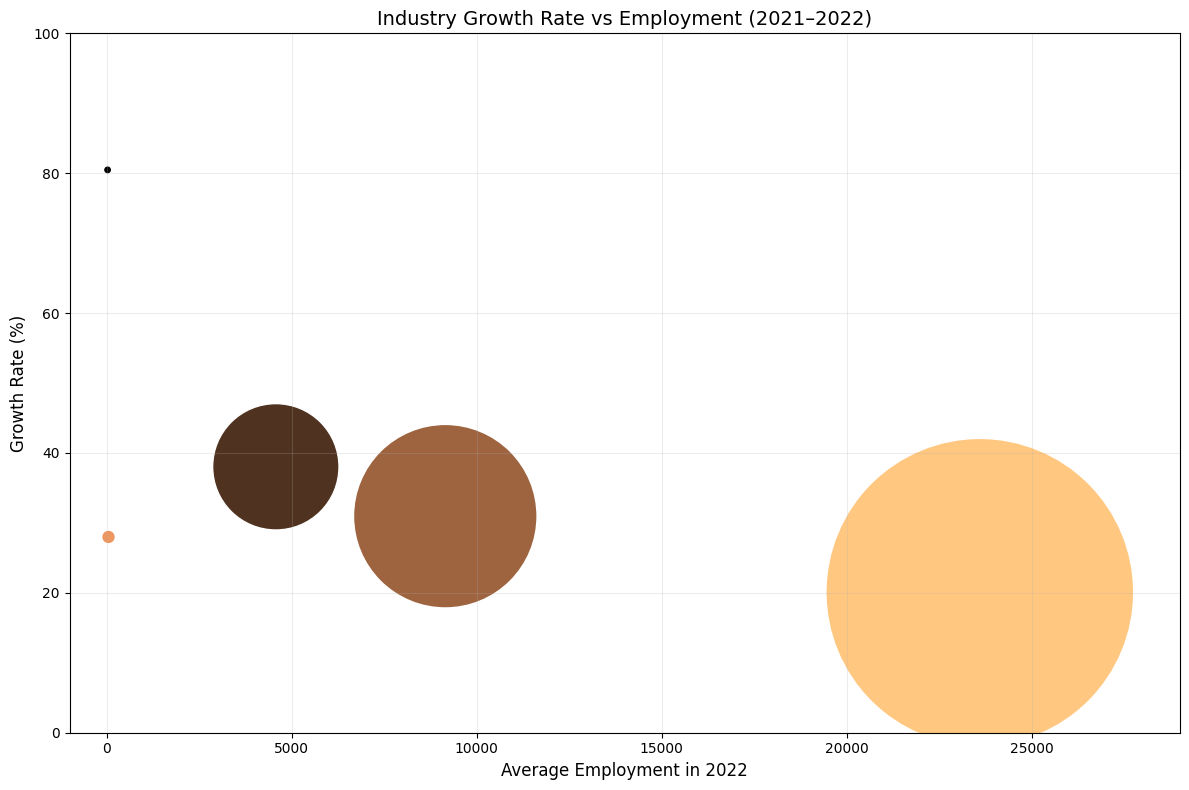

In [275]:
plt.figure(figsize=(12, 8))
plt.scatter(top_industries["avg_employment_2022"], top_industries["growth_rate"],
            s=[e * 2.5 for e in top_industries["avg_employment_2021"]],  # Scale bubble sizes
            # s=[100, 300, 10,10, 30000],
            alpha=1, edgecolors="w", c=range(len(top_industries)), cmap="copper")

# #Add labels for each bubble
# for i, industry in enumerate(top_industries["industry"]):
#     plt.text(top_industries["avg_employment_2022"][i], top_industries["growth_rate"][i], industry, fontsize=9)

# Chart customization
plt.title("Industry Growth Rate vs Employment (2021–2022)", fontsize=14)
plt.xlabel("Average Employment in 2022", fontsize=12)
plt.ylabel("Growth Rate (%)", fontsize=12)
plt.ylim(0, 100)
plt.xlim(-1000, 29000)
plt.grid(alpha=0.23)
plt.tight_layout()

# Show Plot
plt.show()

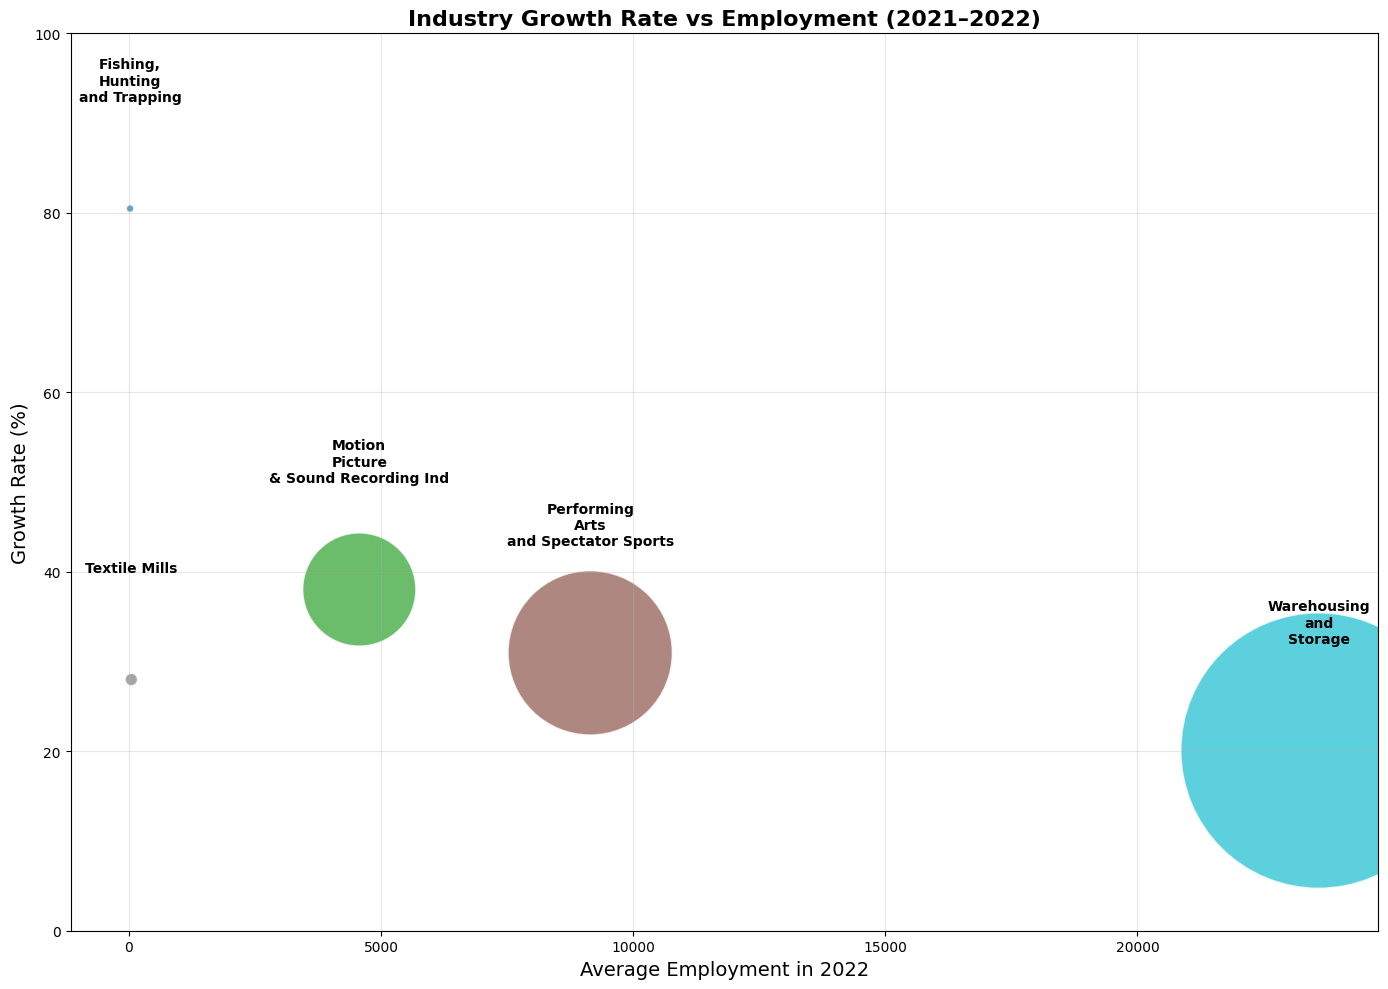

In [273]:
plt.figure(figsize=(14, 10))  # Increased figure size for better readability
plt.scatter(top_industries["avg_employment_2022"], top_industries["growth_rate"],
            s=[e * 2 for e in top_industries["avg_employment_2021"]],  # Scale bubble sizes
            alpha=0.7, edgecolors="w", c=range(len(top_industries)), cmap="tab10")

# Add labels for each bubble
for i, industry in enumerate(top_industries["industry"]):
    # Split long labels into two lines
    formatted_label = "\n".join(industry.split(" ", 2)) if len(industry) > 20 else industry
    # Position above and outside the bubble
    plt.text(
        top_industries["avg_employment_2022"][i],
        top_industries["growth_rate"][i] + 12,  # Slightly above the bubble
        formatted_label,
        fontsize=10, fontweight="bold", ha="center"
    )

# Chart customization
plt.title("Industry Growth Rate vs Employment (2021–2022)", fontsize=16, fontweight="bold")
plt.xlabel("Average Employment in 2022", fontsize=14)
plt.ylabel("Growth Rate (%)", fontsize=14)
plt.grid(alpha=0.3)

# Set y-axis limits
plt.ylim(0, 100)

plt.tight_layout()

# Show Plot
plt.show()

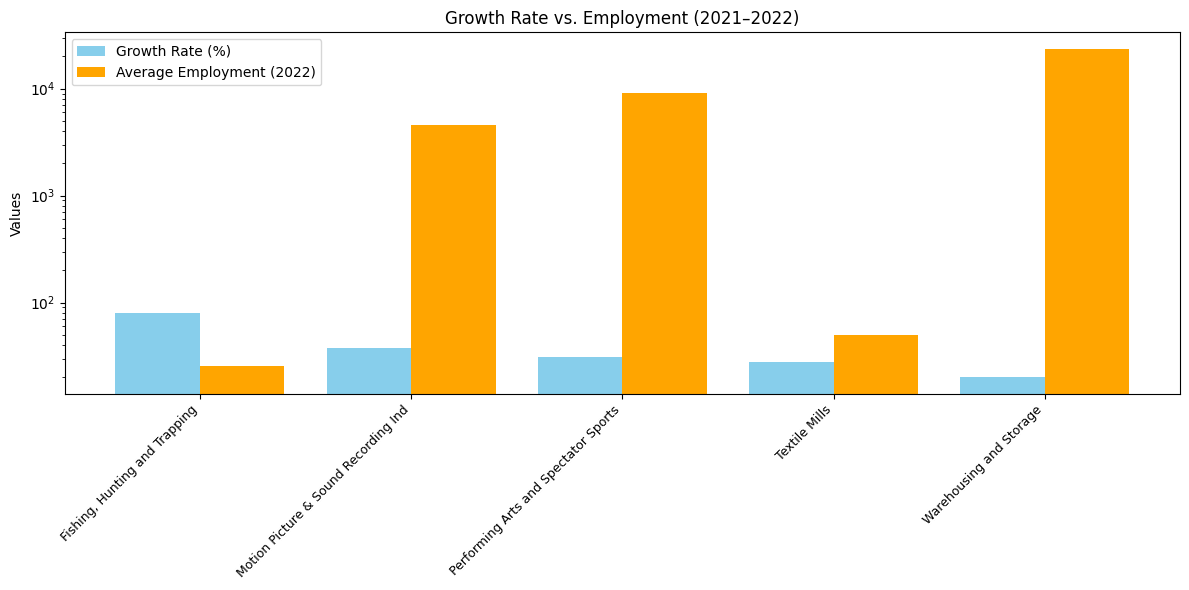

In [274]:
import numpy as np

data = top_industries
industries = data["industry"]
growth_rates = data["growth_rate"]
avg_employment = data["avg_employment_2022"]

x = np.arange(len(industries))  # Position of industries
width = 0.4  # Width of the bars

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, growth_rates, width, label="Growth Rate (%)", color="skyblue")
plt.bar(x + width/2, avg_employment, width, label="Average Employment (2022)", color="orange")
plt.xticks(x, industries, rotation=45, ha="right", fontsize=9)
plt.ylabel("Values")
plt.yscale('log')
plt.title("Growth Rate vs. Employment (2021–2022)")
plt.legend()
plt.tight_layout()
plt.show()